This file sets up the baseline transformer model for comparison.

## Set-up environment

## Installing Transformer

In [15]:
!pip install -q git+https://github.com/huggingface/transformers.git  # Install the transformers package from the Hugging Face GitHub repository

ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Sam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Define model

In [16]:
from transformers import DPTFeatureExtractor, DPTForDepthEstimation

# Create a DPT feature extractor
feature_extractor = DPTFeatureExtractor.from_pretrained("Intel/dpt-large")

# Create a DPT depth estimation model
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

C:\Users\Sam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\models\dpt\feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The code imports the necessary classes from the Transformers library i.e. DPTFeatureExtractor and DPTForDepthEstimation. Then, we created an instance of the DPT feature extractor by calling DPTFeatureExtractor.from_pretrained() and loading the pre-trained weights from the "Intel/dpt-large" model. Similarly, an instance of the DPT depth estimation model is created using DPTForDepthEstimation.from_pretrained() and loading the pre-trained weights from the same "Intel/dpt-large" model.

## Prepare image

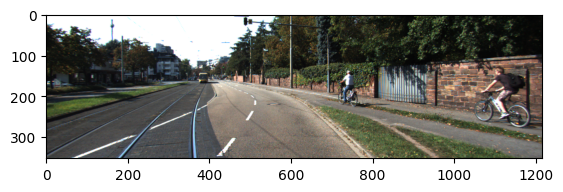

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import os

base_dir = 'dataset'
image_dir = os.path.join(base_dir, 'image')
depth_dir = os.path.join(base_dir, 'groundtruth_depth')

image_filenames = os.listdir(image_dir)
depth_filenames = os.listdir(depth_dir)

image_path = os.path.join(image_dir, image_filenames[0])
image = Image.open(image_path).convert('RGB')

plt.imshow(image)

In [18]:
pixel_values = feature_extractor(image, return_tensors="pt").pixel_values

## Forward pass

In [19]:
import torch

# Use torch.no_grad() to disable gradient computation
with torch.no_grad():
    # Pass the pixel values through the model
    outputs = model(pixel_values)
    # Access the predicted depth values from the outputs
    predicted_depth = outputs.predicted_depth

# plt.imshow(predicted_depth)

## Visualize

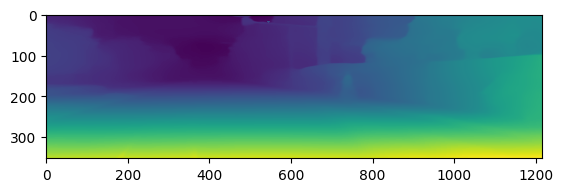

In [20]:
import numpy as np

# Interpolate the predicted depth values to the original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
).squeeze()

# Convert the interpolated depth values to a numpy array
output = prediction.cpu().numpy()

# Scale and format the depth values for visualization
formatted = (output * 255 / np.max(output)).astype('uint8')

# Create an image from the formatted depth values
depth = Image.fromarray(formatted)
plt.imshow(depth)